In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset
df = pd.read_csv('../dataset/personalized_learning_dataset.csv')

# Preprocessing
feature_cols = ['Age', 'Engagement_Level', 'Learning_Style', 'Dropout_Likelihood', 'Quiz_Attempts']
df = df[feature_cols + ['Final_Exam_Score']]
df_encoded = pd.get_dummies(df, columns=['Engagement_Level', 'Learning_Style', 'Dropout_Likelihood'])

def classify_level(score):
    if score < 60:
        return 'low'
    elif score < 85:
        return 'medium'
    else:
        return 'high'

df_encoded['Level'] = df['Final_Exam_Score'].apply(classify_level)
X = df_encoded.drop(columns=['Final_Exam_Score', 'Level'])
y = df_encoded['Level']

# Train model
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(clf, '../models/predictor/predictor.pkl')
joblib.dump(scaler, '../models/predictor/scaler.pkl')
joblib.dump(X.columns.tolist(), '../models/predictor/feature_columns.pkl')


['../models/predictor/feature_columns.pkl']

## preprocesssing the data

In [32]:
import pandas as pd

# Load dataset
df = pd.read_csv('../dataset/personalized_learning_dataset.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Drop irrelevant columns
df.drop(columns=['Student_ID'], inplace=True)

# Label encode 'Dropout_Likelihood'
df['Dropout_Likelihood'] = df['Dropout_Likelihood'].map({'Yes': 1, 'No': 0})

# Label encode 'Gender' (Female = 0, Male = 1)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# One-hot encode the remaining categorical features (excluding Gender)
categorical_cols = ['Education_Level', 'Course_Name', 'Learning_Style']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Optional: Convert any bools to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Preview
df.head()


,Age,Gender,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,...,Education_Level_Undergraduate,Course_Name_Cybersecurity,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development,Learning_Style_Auditory,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual
0,15,0.0,171,4,67,2,89,Medium,51,1,...,0,0,0,1,0,0,0,0,0,1
1,49,1.0,156,4,64,0,94,Medium,92,5,...,1,0,0,0,1,0,0,0,1,0
2,20,0.0,217,2,55,2,67,Medium,45,1,...,1,0,0,0,1,0,0,0,1,0
3,37,0.0,489,1,65,43,60,High,59,4,...,1,0,1,0,0,0,0,0,0,1
4,34,0.0,496,3,59,34,88,Medium,93,3,...,0,0,0,0,1,0,0,0,0,1


### Convert ordinal categories (if any)

In [33]:
engagement_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Engagement_Level'] = df['Engagement_Level'].map(engagement_map)
df.head()


,Age,Gender,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,...,Education_Level_Undergraduate,Course_Name_Cybersecurity,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development,Learning_Style_Auditory,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual
0,15,0.0,171,4,67,2,89,1,51,1,...,0,0,0,1,0,0,0,0,0,1
1,49,1.0,156,4,64,0,94,1,92,5,...,1,0,0,0,1,0,0,0,1,0
2,20,0.0,217,2,55,2,67,1,45,1,...,1,0,0,0,1,0,0,0,1,0
3,37,0.0,489,1,65,43,60,2,59,4,...,1,0,1,0,0,0,0,0,0,1
4,34,0.0,496,3,59,34,88,1,93,3,...,0,0,0,0,1,0,0,0,0,1


### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age', 'Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores',
                'Forum_Participation', 'Assignment_Completion_Rate', 'Final_Exam_Score', 'Feedback_Score']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()


,Age,Gender,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,...,Education_Level_Undergraduate,Course_Name_Cybersecurity,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development,Learning_Style_Auditory,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual
0,-1.703186,0.0,-0.595664,1.335755,0.119351,-1.578287,1.120582,1,-0.681598,-1.415976,...,0,0,0,1,0,0,0,0,0,1
1,1.675816,1.0,-0.701559,1.335755,-0.028519,-1.717858,1.408601,1,1.358668,1.398246,...,1,0,0,0,1,0,0,0,1,0
2,-1.206274,0.0,-0.270918,-0.445845,-0.472129,-1.578287,-0.146706,1,-0.980174,-1.415976,...,1,0,0,0,1,0,0,0,1,0
3,0.483227,0.0,1.649317,-1.336646,0.020771,1.282926,-0.549934,2,-0.283498,0.694691,...,1,0,1,0,0,0,0,0,0,1
4,0.185080,0.0,1.698735,0.444955,-0.274969,0.654855,1.062978,1,1.408431,-0.008865,...,0,0,0,0,1,0,0,0,0,1


### saving the preprocessed data

In [36]:
# Save preprocessed data
df.to_csv('../dataset/cleaned/processed_learning_dataset.csv', index=False)


## Split (Train / Val / Test)

In [48]:
df_processed = pd.read_csv('../dataset/cleaned/processed_learning_dataset.csv') 

from sklearn.model_selection import train_test_split

# Target variable
y = df_processed['Final_Exam_Score']

# Features - drop target and Dropout_Likelihood to avoid leakage
X = df_processed.drop(columns=['Final_Exam_Score', 'Dropout_Likelihood'])

# Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)



Train set: (7000, 21) (7000,)
Validation set: (1500, 21) (1500,)
Test set: (1500, 21) (1500,)


## EDA and Feature Engineering

### Summary Statistics & Distributions

                Age       Gender  Time_Spent_on_Videos  Quiz_Attempts  \
count  1.000000e+04  9585.000000          1.000000e+04   1.000000e+04   
mean  -6.750156e-18     0.490245         -3.055334e-17   4.618528e-18   
std    1.000050e+00     0.499931          1.000050e+00   1.000050e+00   
min   -1.703186e+00     0.000000         -1.732274e+00  -1.336646e+00   
25%   -8.087442e-01     0.000000         -8.780516e-01  -1.336646e+00   
50%   -1.368496e-02     0.000000          1.146917e-02   4.449547e-01   
75%    8.807566e-01     1.000000          8.656915e-01   1.335755e+00   
max    1.675816e+00     1.000000          1.719914e+00   1.335755e+00   

        Quiz_Scores  Forum_Participation  Assignment_Completion_Rate  \
count  1.000000e+04         1.000000e+04                1.000000e+04   
mean   3.836931e-17         2.344791e-17               -2.842171e-17   
std    1.000050e+00         1.000050e+00                1.000050e+00   
min   -1.704378e+00        -1.717858e+00              

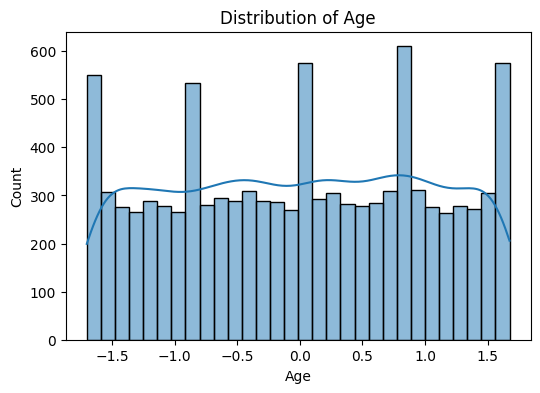

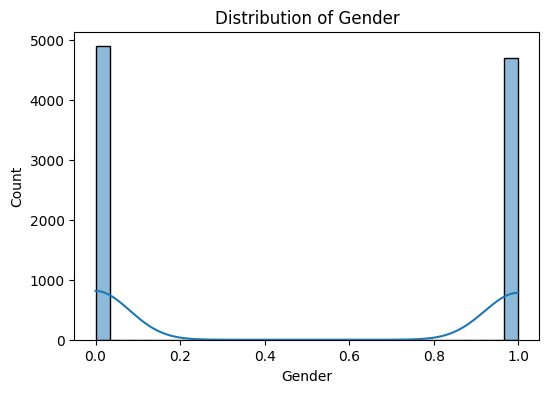

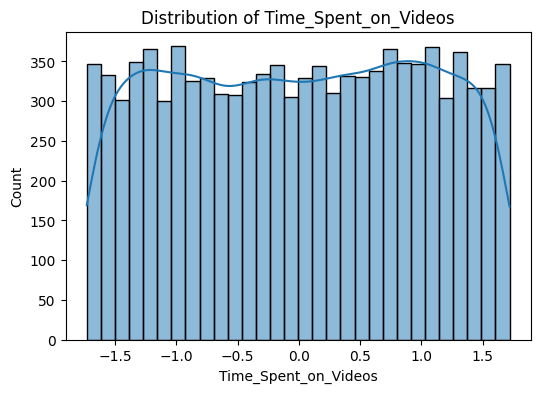

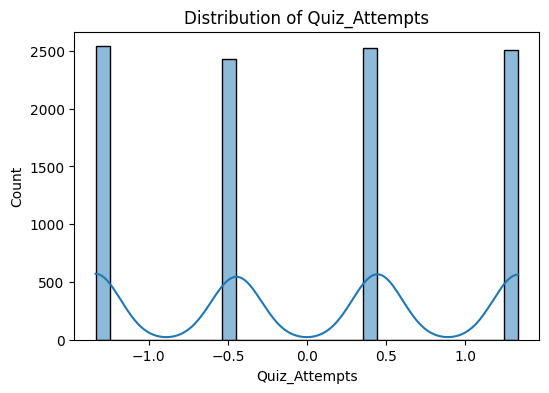

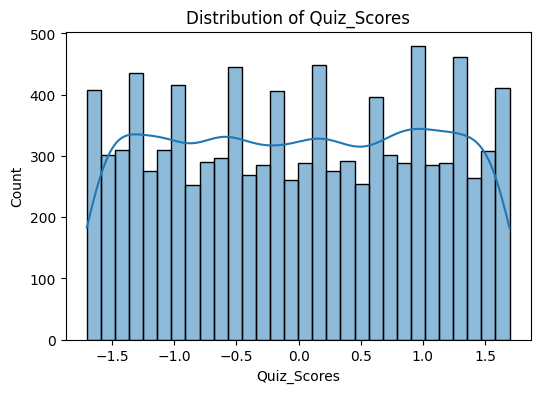

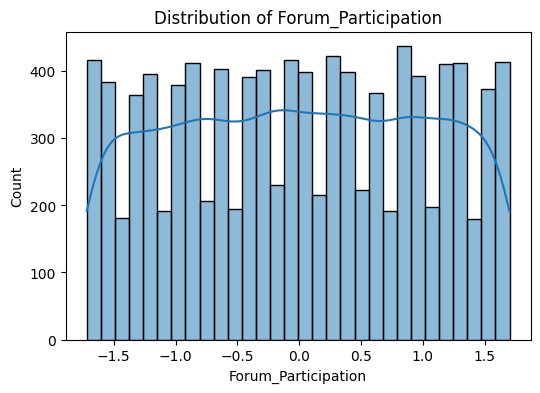

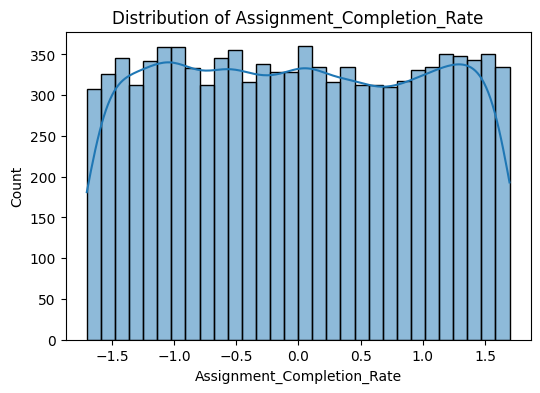

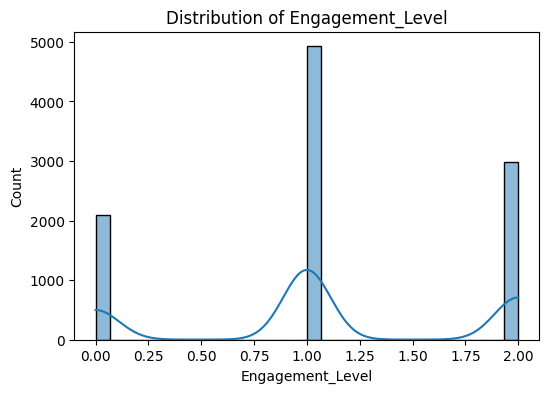

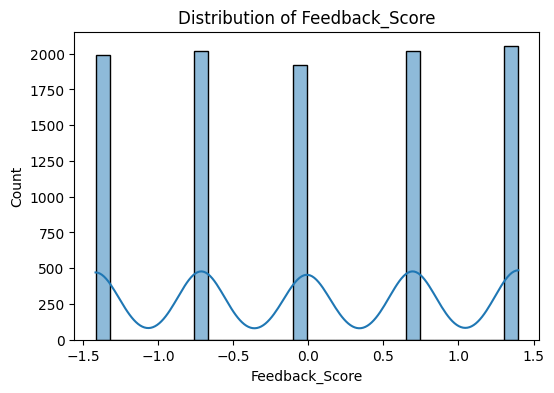

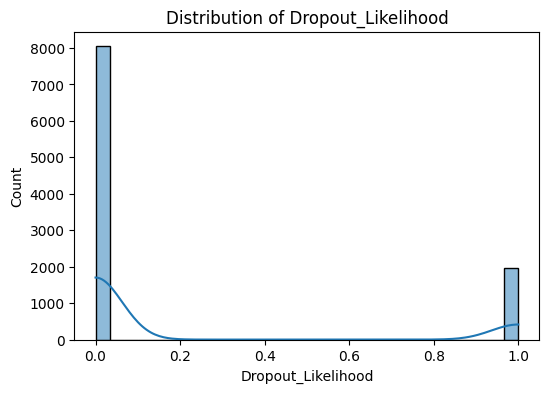

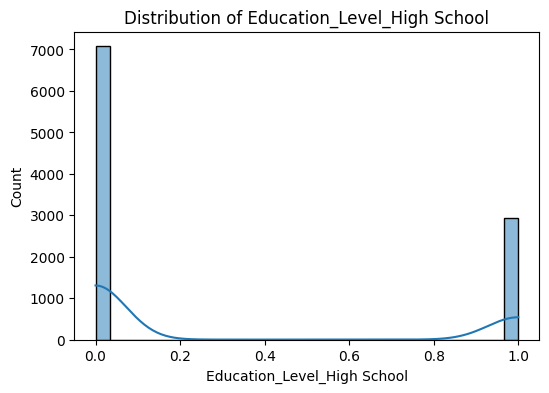

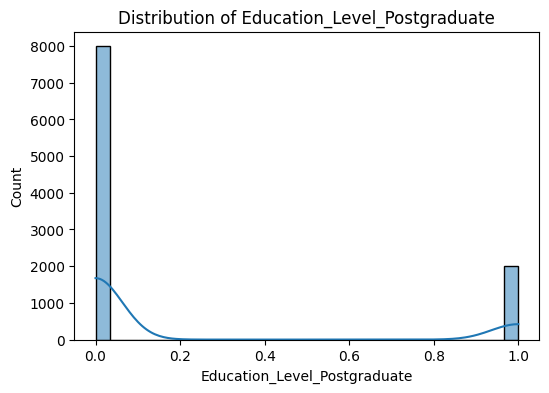

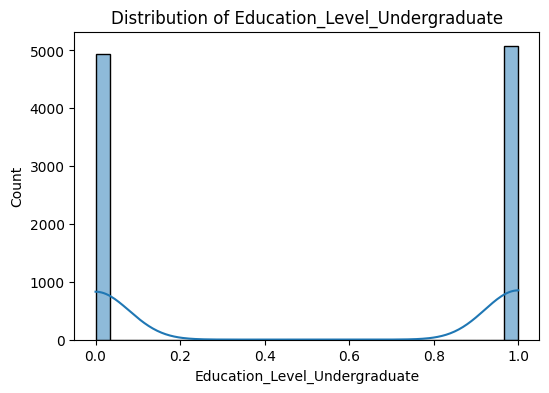

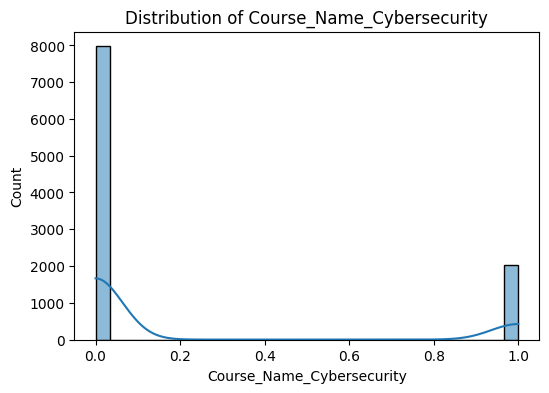

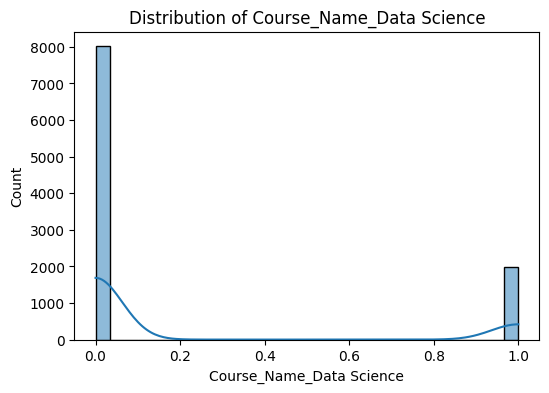

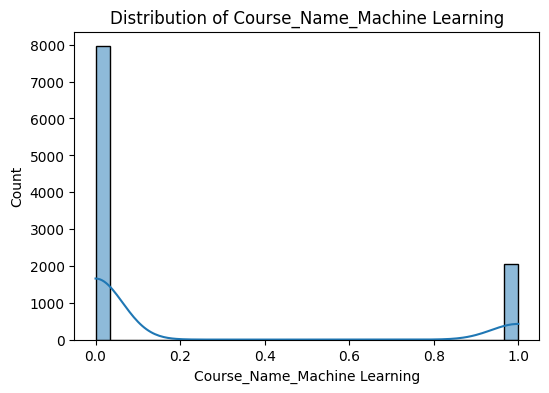

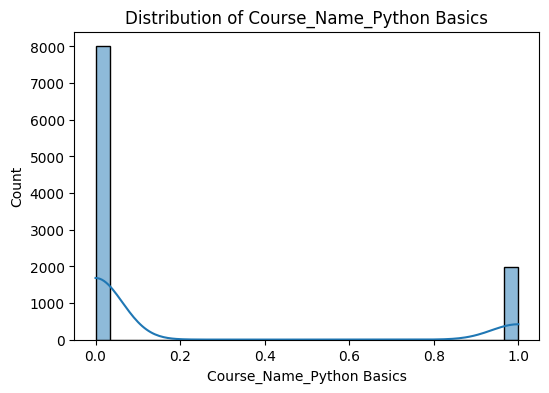

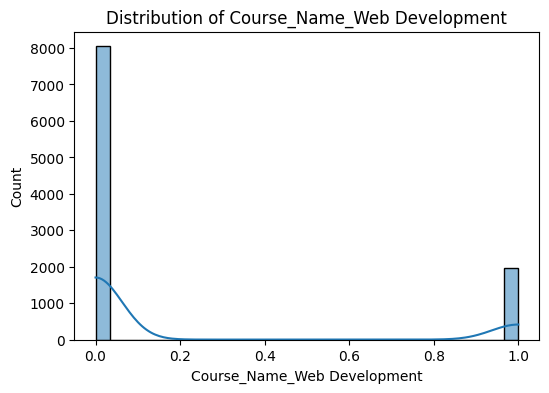

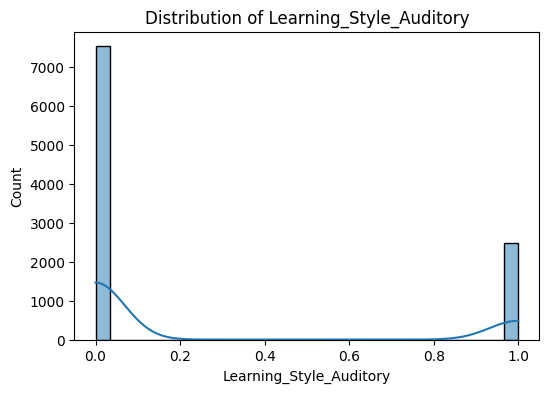

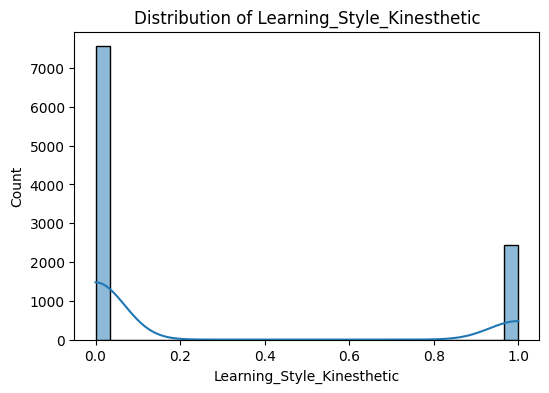

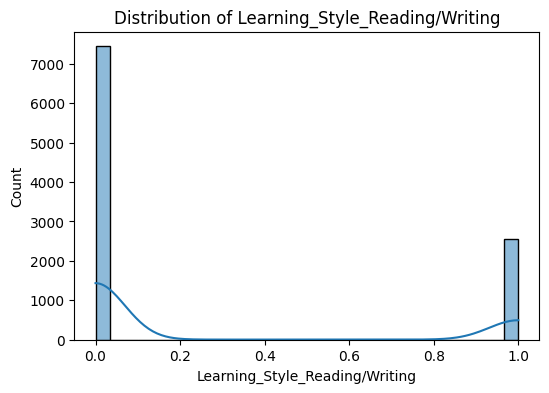

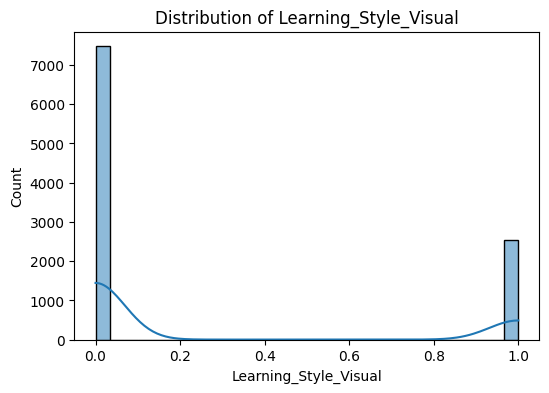

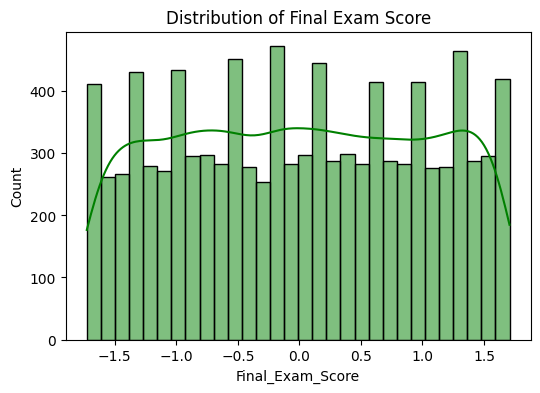

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df_processed.describe())

# Distribution of numeric features (histograms)
numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.drop('Final_Exam_Score')

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_processed[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of the target
plt.figure(figsize=(6,4))
sns.histplot(df_processed['Final_Exam_Score'], kde=True, bins=30, color='green')
plt.title('Distribution of Final Exam Score')
plt.show()


### Correlation Heatmap

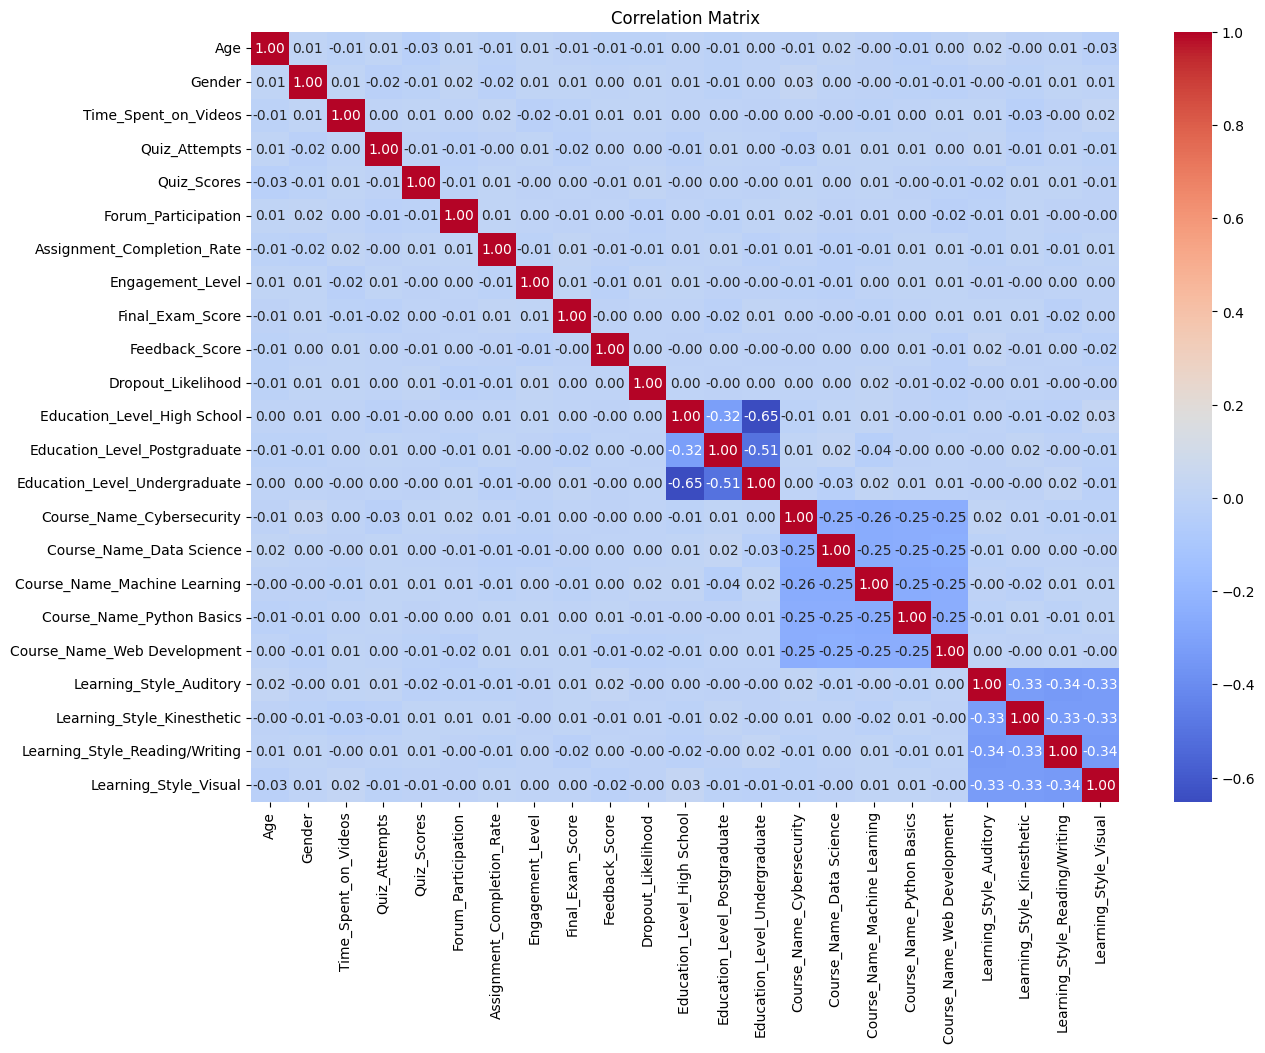

Top correlations with Final_Exam_Score:
Final_Exam_Score                 1.000000
Assignment_Completion_Rate       0.014466
Education_Level_Undergraduate    0.012991
Learning_Style_Kinesthetic       0.012140
Learning_Style_Auditory          0.011859
Course_Name_Web Development      0.010303
Gender                           0.008439
Engagement_Level                 0.006998
Quiz_Scores                      0.004705
Dropout_Likelihood               0.004339
Name: Final_Exam_Score, dtype: float64
Learning_Style_Visual             0.000379
Feedback_Score                   -0.003329
Course_Name_Data Science         -0.003517
Age                              -0.005315
Forum_Participation              -0.006267
Course_Name_Machine Learning     -0.008726
Time_Spent_on_Videos             -0.009718
Education_Level_Postgraduate     -0.017094
Quiz_Attempts                    -0.018079
Learning_Style_Reading/Writing   -0.024079
Name: Final_Exam_Score, dtype: float64


In [39]:
plt.figure(figsize=(14,10))
corr_matrix = df_processed.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Optional: print top features correlated with target
target_corr = corr_matrix['Final_Exam_Score'].sort_values(ascending=False)
print("Top correlations with Final_Exam_Score:")
print(target_corr.head(10))
print(target_corr.tail(10))


###  Scatter plots between numeric features and Final Exam Score

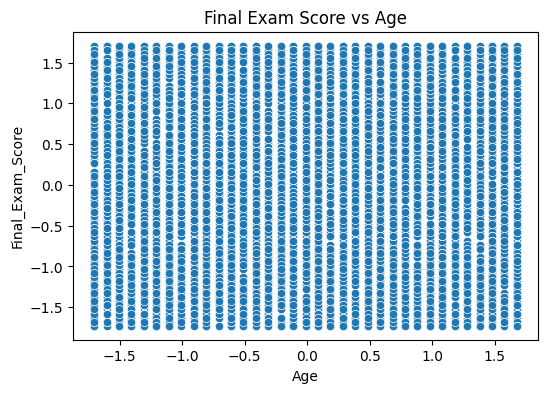

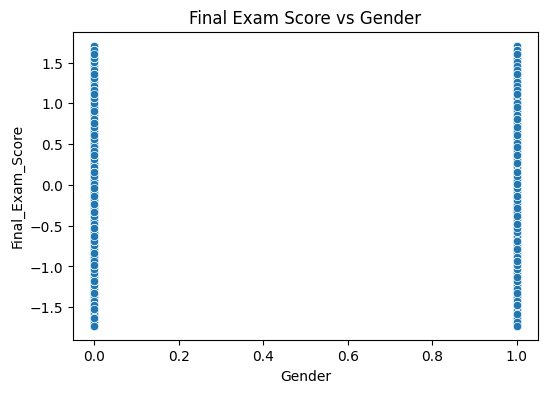

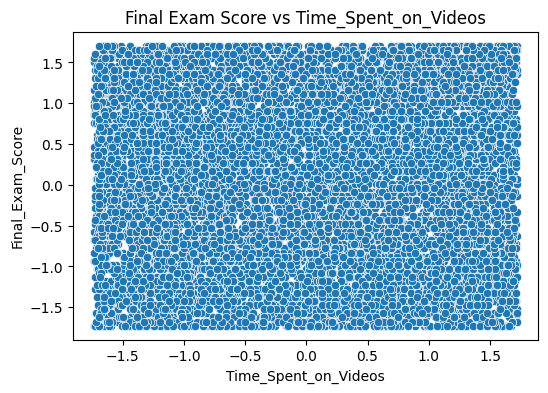

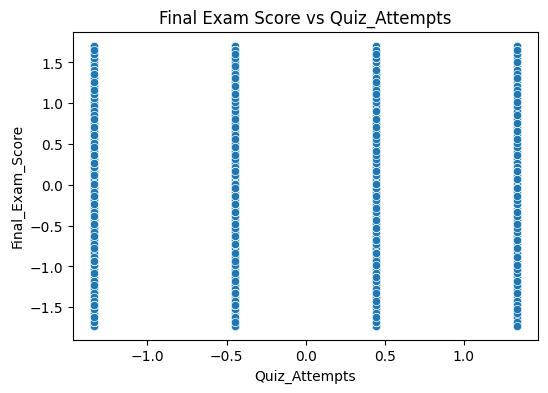

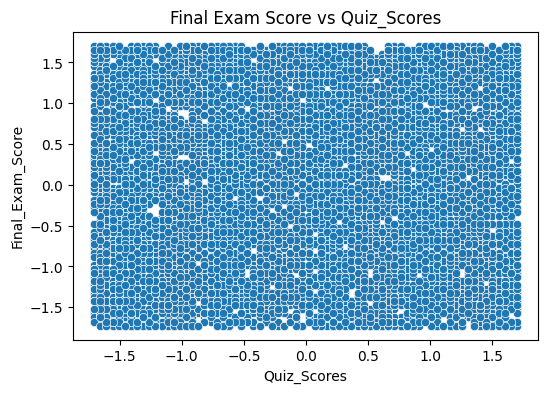

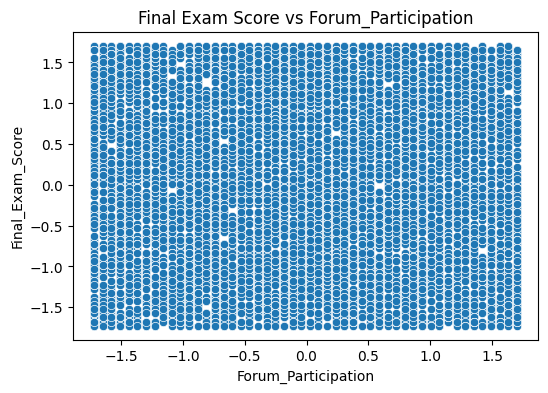

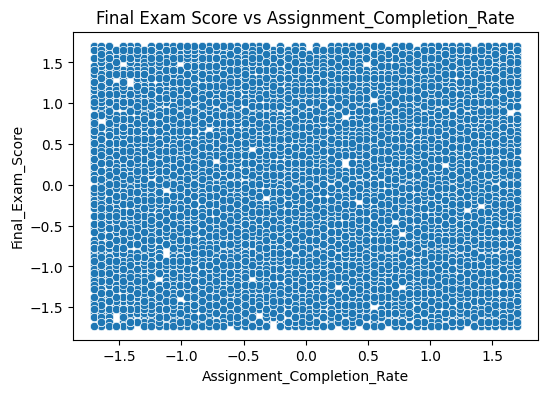

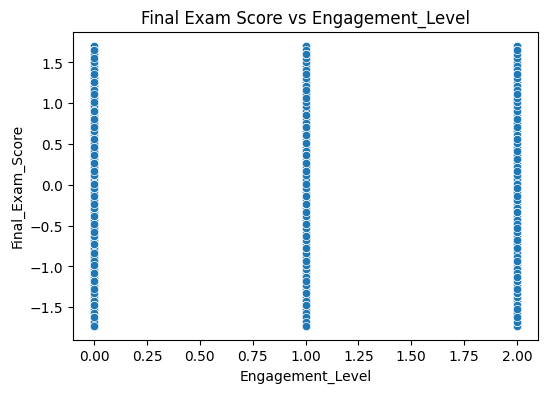

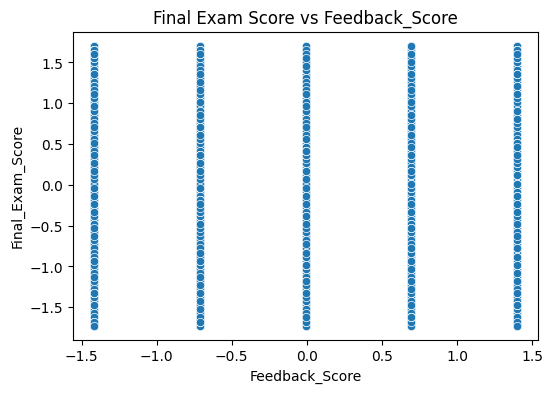

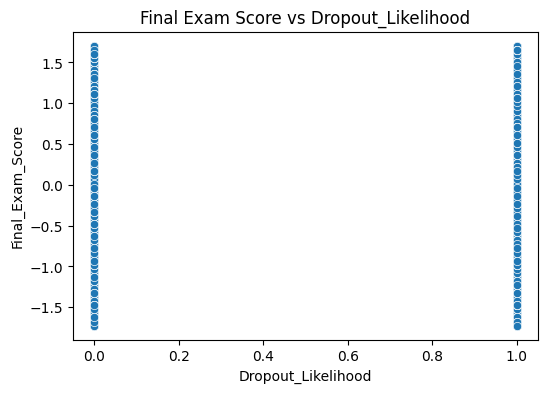

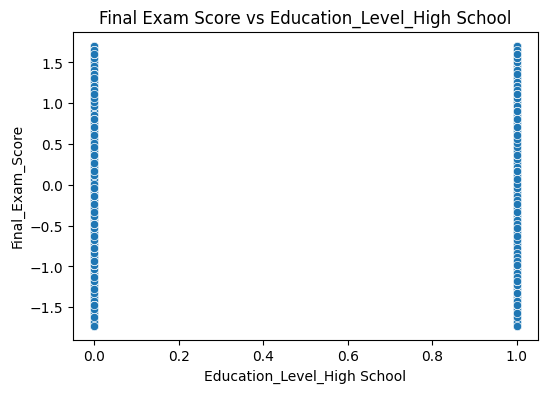

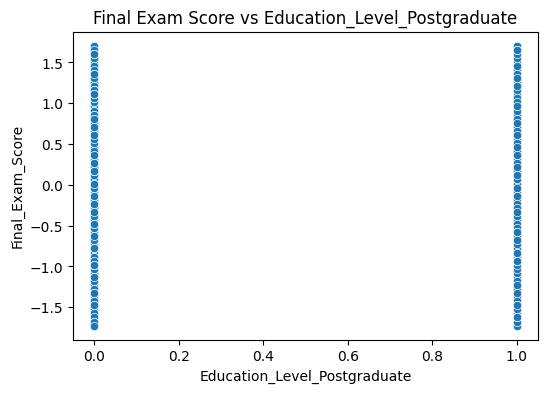

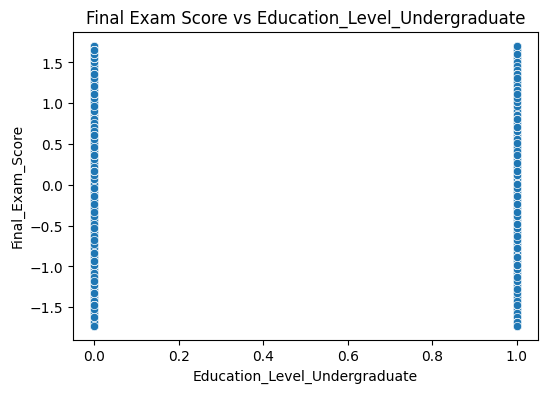

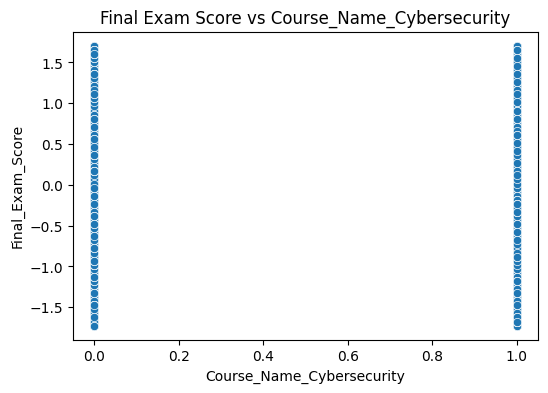

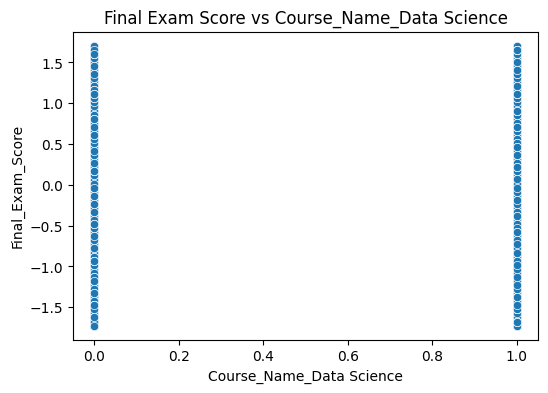

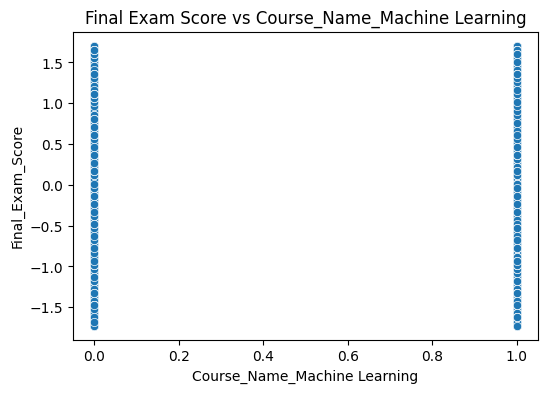

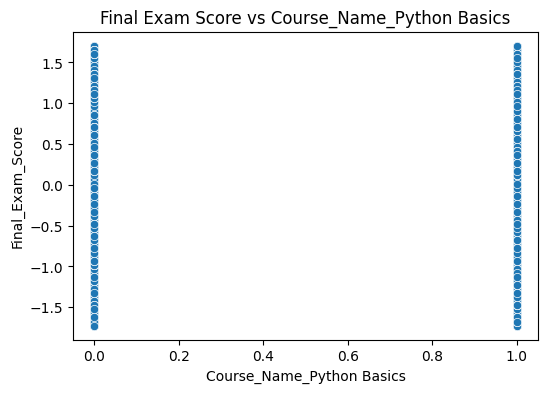

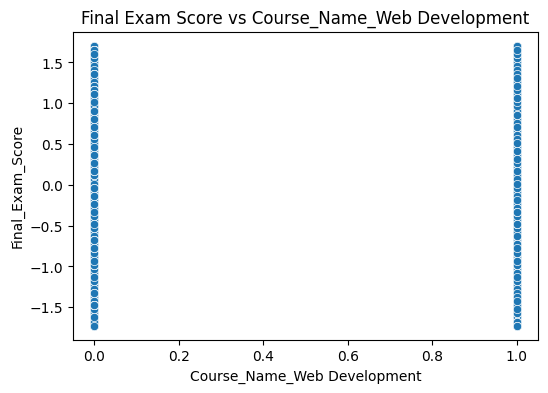

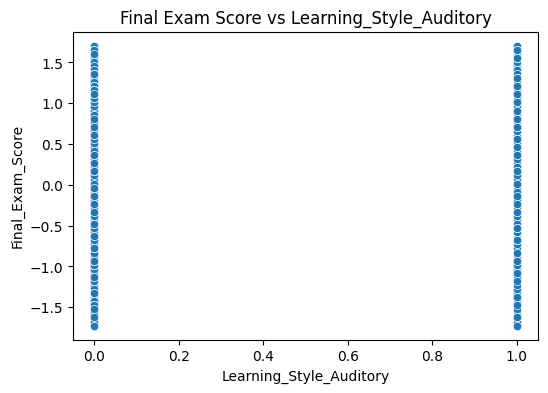

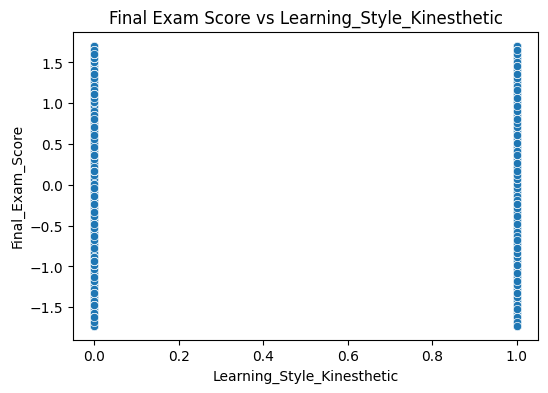

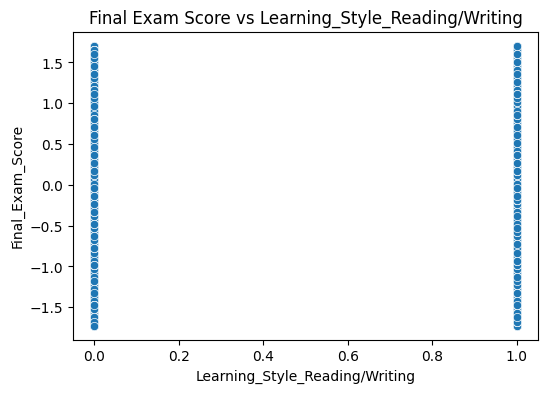

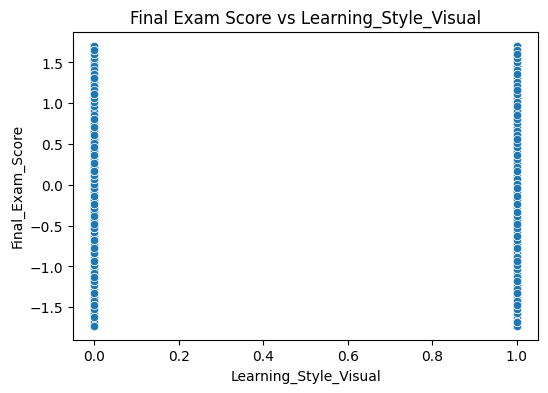

In [40]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_processed[col], y=df_processed['Final_Exam_Score'])
    plt.title(f'Final Exam Score vs {col}')
    plt.show()


### Boxplots for categorical variables vs Final Exam Score

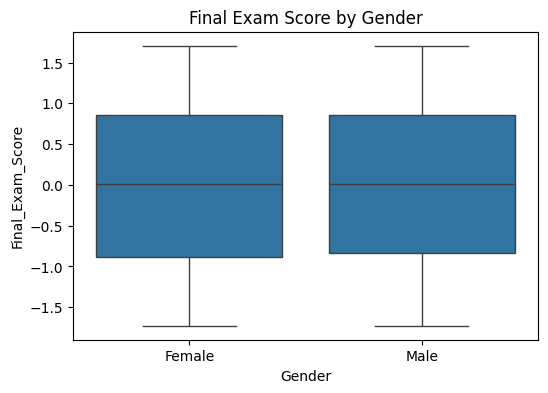

In [42]:
# Example: Final Exam Score by Gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Final_Exam_Score', data=df_processed)
plt.xticks([0,1], ['Female', 'Male'])
plt.title('Final Exam Score by Gender')
plt.show()

# For any other one-hot encoded category columns, replace 'Gender_Male' with column name
# Example: Engagement_Level if ordinal encoded below


### Outlier Detection with Boxplots

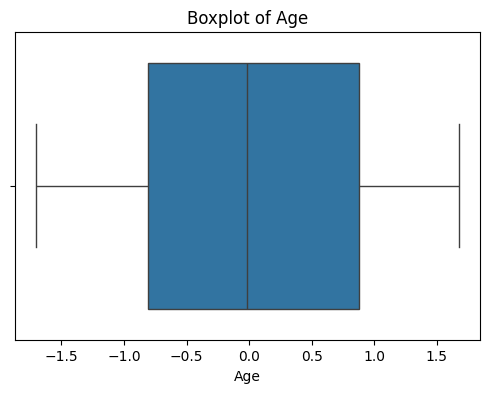

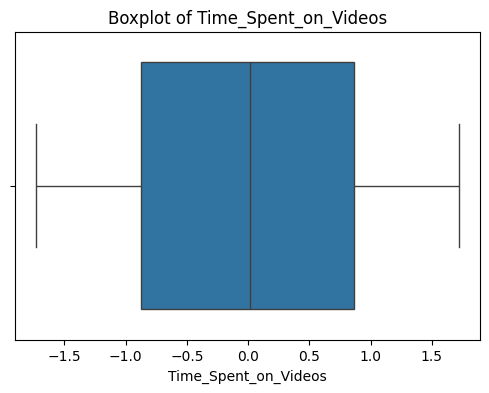

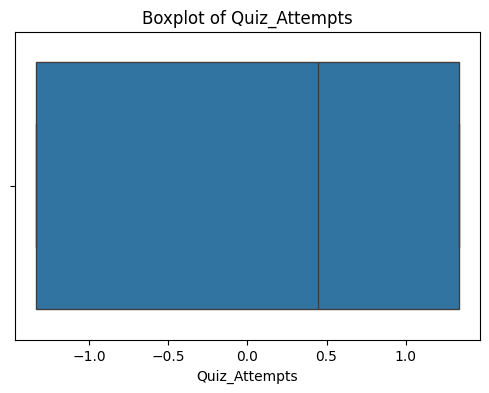

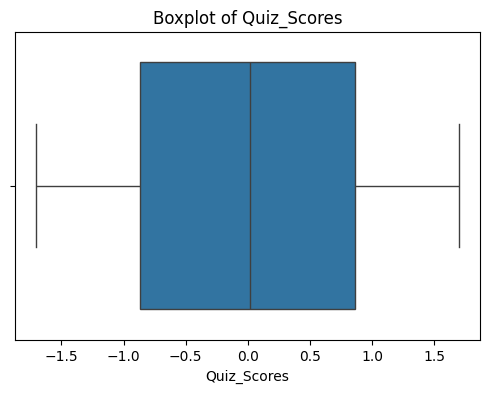

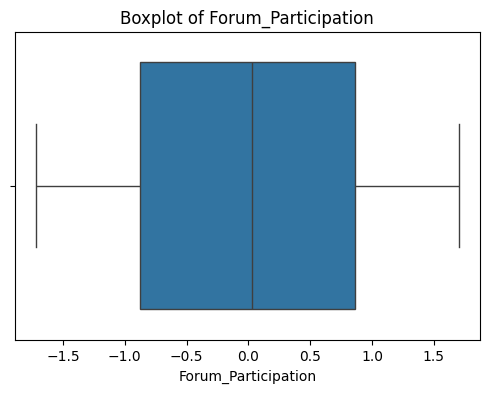

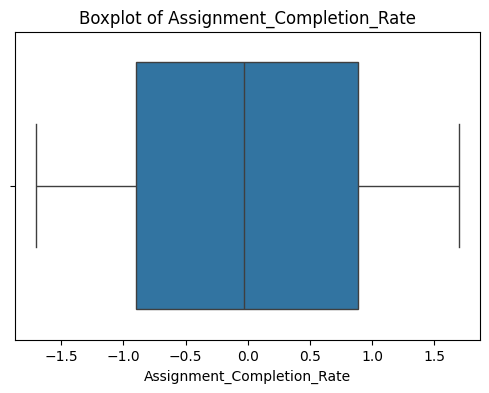

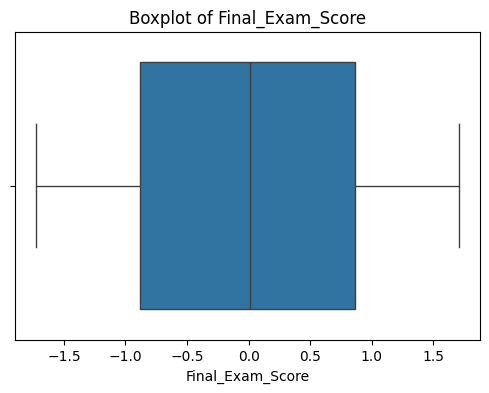

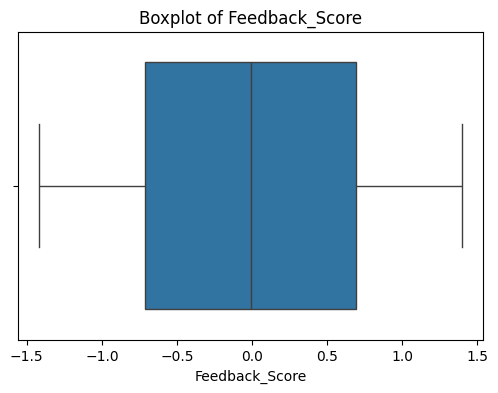

In [47]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_processed[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# List of features to scale - excluding target
features_to_scale = numeric_cols.tolist()

# Fit scaler on features and transform
df_processed[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])

(df_processed.head())


,Age,Gender,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Feedback_Score,...,Education_Level_Undergraduate,Course_Name_Cybersecurity,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development,Learning_Style_Auditory,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual
0,-1.703186,-0.980677,-0.595664,1.335755,0.119351,-1.578287,1.120582,-0.125512,-0.681598,-1.415976,...,-1.014099,-0.504059,-0.497499,1.973515,-0.499062,-0.492645,-0.573963,-0.568574,-0.585665,1.720580
1,1.675816,1.019704,-0.701559,1.335755,-0.028519,-1.717858,1.408601,-0.125512,1.358668,1.398246,...,0.986097,-0.504059,-0.497499,-0.506710,2.003758,-0.492645,-0.573963,-0.568574,1.707462,-0.581199
2,-1.206274,-0.980677,-0.270918,-0.445845,-0.472129,-1.578287,-0.146706,-0.125512,-0.980174,-1.415976,...,0.986097,-0.504059,-0.497499,-0.506710,2.003758,-0.492645,-0.573963,-0.568574,1.707462,-0.581199
3,0.483227,-0.980677,1.649317,-1.336646,0.020771,1.282926,-0.549934,1.289505,-0.283498,0.694691,...,0.986097,-0.504059,2.010055,-0.506710,-0.499062,-0.492645,-0.573963,-0.568574,-0.585665,1.720580
4,0.185080,-0.980677,1.698735,0.444955,-0.274969,0.654855,1.062978,-0.125512,1.408431,-0.008865,...,-1.014099,-0.504059,-0.497499,-0.506710,2.003758,-0.492645,-0.573963,-0.568574,-0.585665,1.720580


## Model Selection and Training

### Train Linear Regression (Baseline)



In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from sklearn.impute import SimpleImputer

# Create imputer (fill NaNs with mean of each column)
imputer = SimpleImputer(strategy='mean')

# Fit on training data, transform train, val, and test
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)





In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_val_pred_lr = lr_model.predict(X_val)

print("🔹 Linear Regression")
print("R² Score:", r2_score(y_val, y_val_pred_lr))

mse = mean_squared_error(y_val, y_val_pred_lr)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

🔹 Linear Regression
R² Score: -0.0005442631605689918
RMSE: 1.0175131858365773


### Train Random Forest Regressor

In [56]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate
print("\n🔹 Random Forest Regressor")
print("R² Score:", r2_score(y_val, y_val_pred_rf))
mse = mean_squared_error(y_val, y_val_pred_rf)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


🔹 Random Forest Regressor
R² Score: -0.04159909272090245
RMSE: 1.0381788791314621


### Feature Engineering: Add or Improve Features

In [58]:
# Interaction Features
df_processed['Quiz_Score_per_Attempt'] = df_processed['Quiz_Scores'] / (df_processed['Quiz_Attempts'] + 1)
df_processed['Video_Efficiency'] = df_processed['Quiz_Scores'] / (df_processed['Time_Spent_on_Videos'] + 1)

# Binary Engagement Level (1 if Engagement_Level is medium or high)
# Since standardized, assuming original values: High = 1, Medium = 0, Low = -1
df_processed['Is_Engaged'] = df_processed['Engagement_Level'].apply(lambda x: 1 if x >= 0 else 0)


###  Feature Importance Analysis

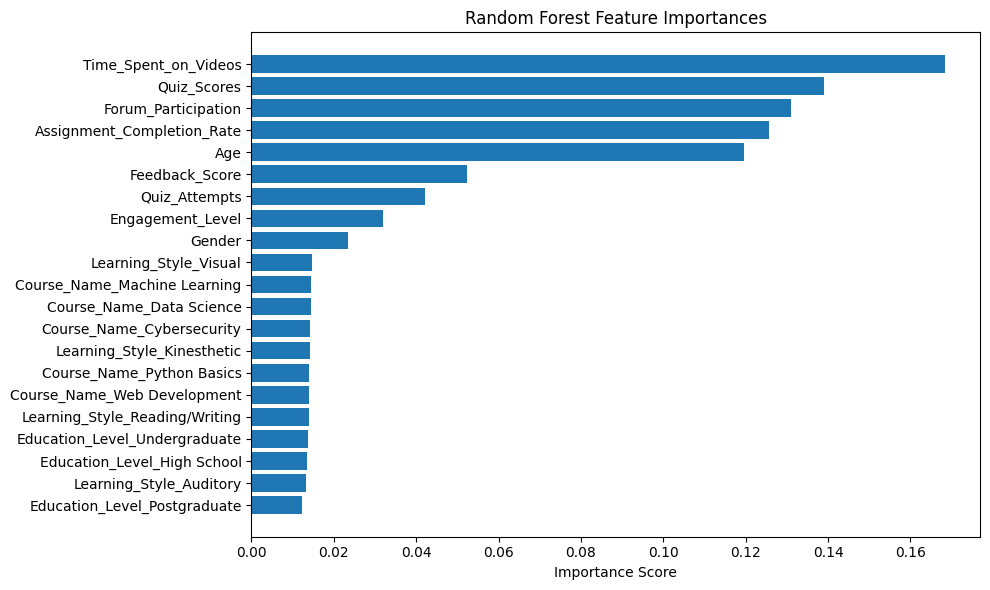

In [61]:
import matplotlib.pyplot as plt

# Get feature importances from trained Random Forest model
importances = rf_model.feature_importances_

# Get feature names from original DataFrame
features = X.columns  # X = your DataFrame before train_test_split

# Sort the features by importance
sorted_idx = importances.argsort()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


### Try Other Models (especially tree-based and boosting)

In [62]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb_model = HistGradientBoostingRegressor(random_state=42)
hgb_model.fit(X_train, y_train)
y_val_pred_hgb = hgb_model.predict(X_val)

print("R² Score:", r2_score(y_val, y_val_pred_hgb))
mse = mean_squared_error(y_val, y_val_pred_hgb)
rmse = np.sqrt(mse)

print("RMSE:", rmse)



R² Score: -0.04830663629918042
RMSE: 1.0415162741153041


## trying classifier

#### RandomForestClassifier + Accuracy

✅ Accuracy: 100.0 %

📋 Classification Report:
              precision    recall  f1-score   support

         low       1.00      1.00      1.00      1500

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5268\1548085211.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\LENOVO\OneDrive\Documents\FTL python bootcamp\capstone_project\latest_personalized_e-learning\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


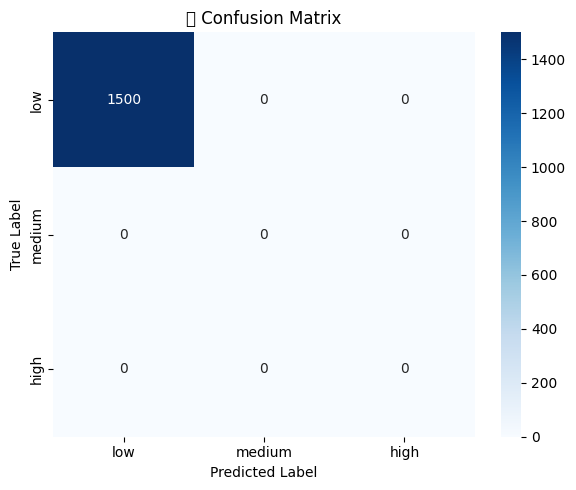

In [66]:
# 1. Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = clf.predict(X_test)

# 4. Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")

# 5. Print classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("📊 Confusion Matrix")
plt.tight_layout()
plt.show()


In [64]:
# 1. Load your processed data
df_processed = pd.read_csv('../dataset/cleaned/processed_learning_dataset.csv')

# 2. Define classify function
def classify_level(score):
    if score < 60:
        return 'low'
    elif score < 85:
        return 'medium'
    else:
        return 'high'

# 3. Create target class labels before splitting
df_processed['Level'] = df_processed['Final_Exam_Score'].apply(classify_level)

# 4. Prepare features and target
X = df_processed.drop(columns=['Final_Exam_Score', 'Dropout_Likelihood', 'Level'])  # keep only features
y = df_processed['Level']  # classification target

# 5. Split with stratify=y to maintain class proportions
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train set:", X_train.shape, y_train.value_counts())
print("Validation set:", X_val.shape, y_val.value_counts())
print("Test set:", X_test.shape, y_test.value_counts())


Train set: (7000, 21) Level
low    7000
Name: count, dtype: int64
Validation set: (1500, 21) Level
low    1500
Name: count, dtype: int64
Test set: (1500, 21) Level
low    1500
Name: count, dtype: int64


In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

y_test_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))


Validation Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         low       1.00      1.00      1.00      1500

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix:
 [[1500]]
Test Accuracy: 1.0

Test Classification Report:
               precision    recall  f1-score   support

         low       1.00      1.00      1.00      1500

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



c:\Users\LENOVO\OneDrive\Documents\FTL python bootcamp\capstone_project\latest_personalized_e-learning\myenv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
